In [1]:
import phate
import umap
import numpy as np
import pandas as pd
import networkx as nx

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

### Datasets

In [2]:
datasets = {
    "DS9": {
        "sim_data": "data/DS9/SERGIO_sim_DS9.npy",
        "ground_truth": "data/DS9/gt_GRN.csv"
    },
    "DS10": {
        "sim_data": "data/DS10/SERGIO_sim_DS10.npy",
        "ground_truth": "data/DS10/gt_GRN.csv"
    },
    "DS12": {
        "sim_data": "data/DS12/SERGIO_sim_DS12.npy",
        "ground_truth": "data/DS12/gt_GRN.csv"
    }
}

### Plotting

In [3]:
dataset = "DS10"
sim_data = np.load(datasets[dataset]["sim_data"], allow_pickle=True, encoding='bytes').item()
gt = pd.read_csv(datasets[dataset]["ground_truth"], header=None)
gt.columns = ["edge_from","edge_to"]

In [4]:
X = sim_data[b'unspliced_expr']
(num_cell_types, num_genes, num_cells_per_type) = X.shape

mean_expr = np.mean(X, axis=2)

In [5]:
grn_graph = nx.Graph(list(gt.itertuples(index=False)))
grn_graph_pos = nx.spring_layout(grn_graph)

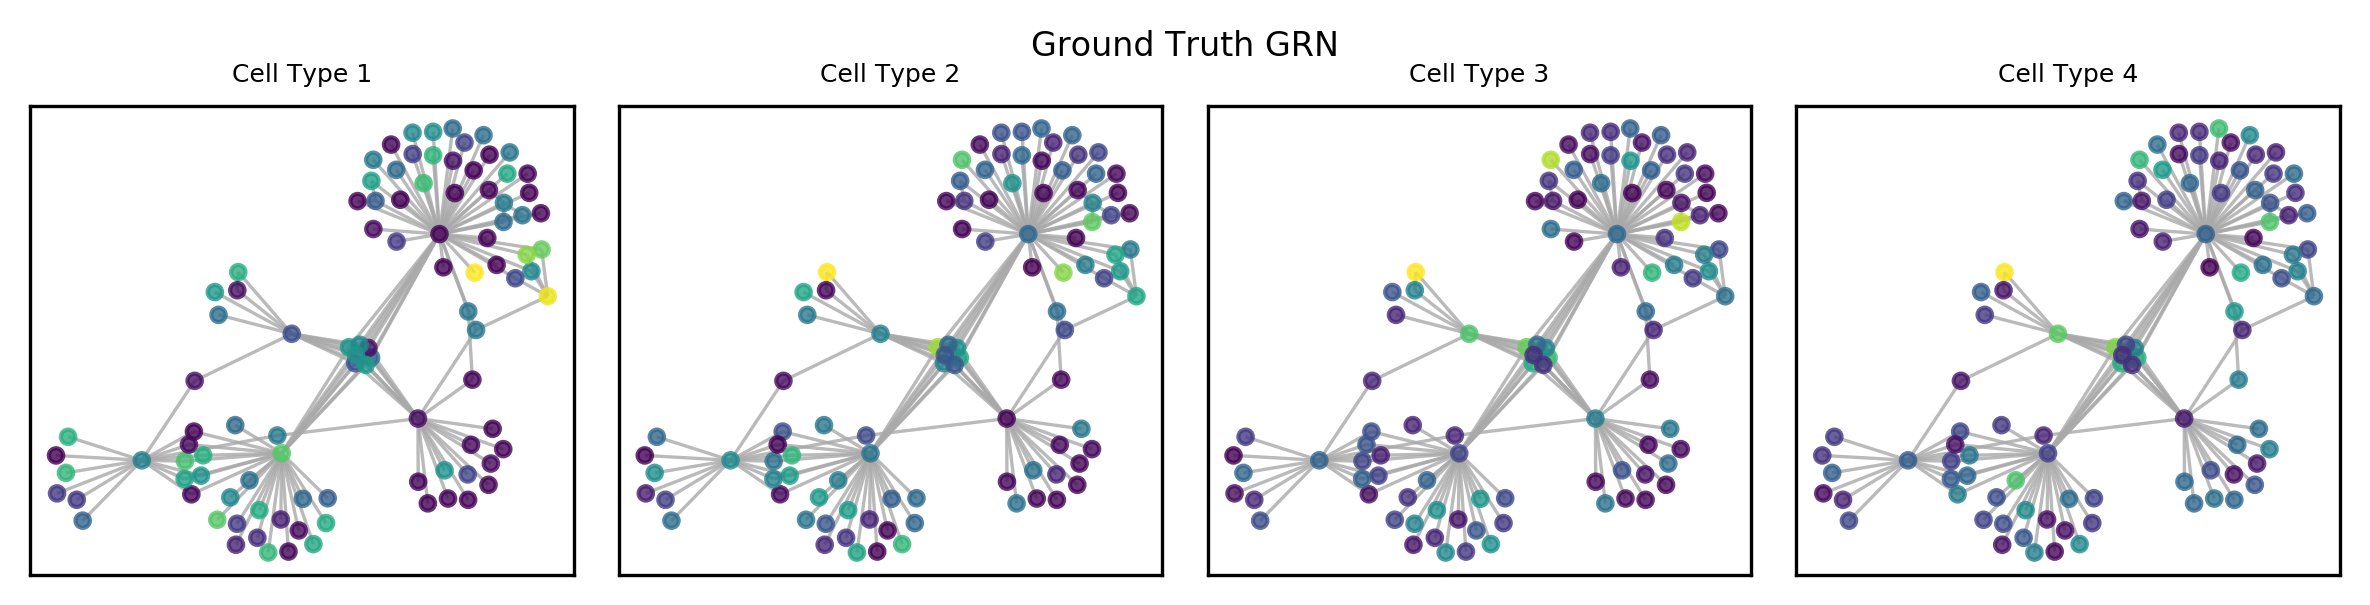

In [6]:
fig, axs = plt.subplots(1, num_cell_types, figsize=(2*num_cell_types,2.01), dpi=300)

for ctype in range(num_cell_types):

    nx.draw_networkx(grn_graph, pos=grn_graph_pos,
                     node_size=12, node_color=mean_expr[ctype,:], linewidth=0.1,
                     edge_color="darkgray", width=0.8,
                     with_labels=False, font_size=3,   
                     alpha=0.8, ax=axs[ctype])
    axs[ctype].set_title(f"Cell Type {ctype+1}", fontsize=6)

fig.suptitle("Ground Truth GRN", fontsize=8)
plt.tight_layout()
plt.show()

In [7]:
X_all = np.concatenate(X, axis = 1)
scaled_X = StandardScaler().fit_transform(X_all.T)

In [8]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(scaled_X)

In [9]:
phate_op = phate.PHATE()
X_PHATE = phate_op.fit_transform(scaled_X)

Calculating PHATE...
  Running PHATE on 1200 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.24 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.27 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 0.42 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.21 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.15 seconds.
Calculated PHATE in 4.09 seconds.


In [10]:
reducer = umap.UMAP()
X_UMAP = reducer.fit_transform(scaled_X)

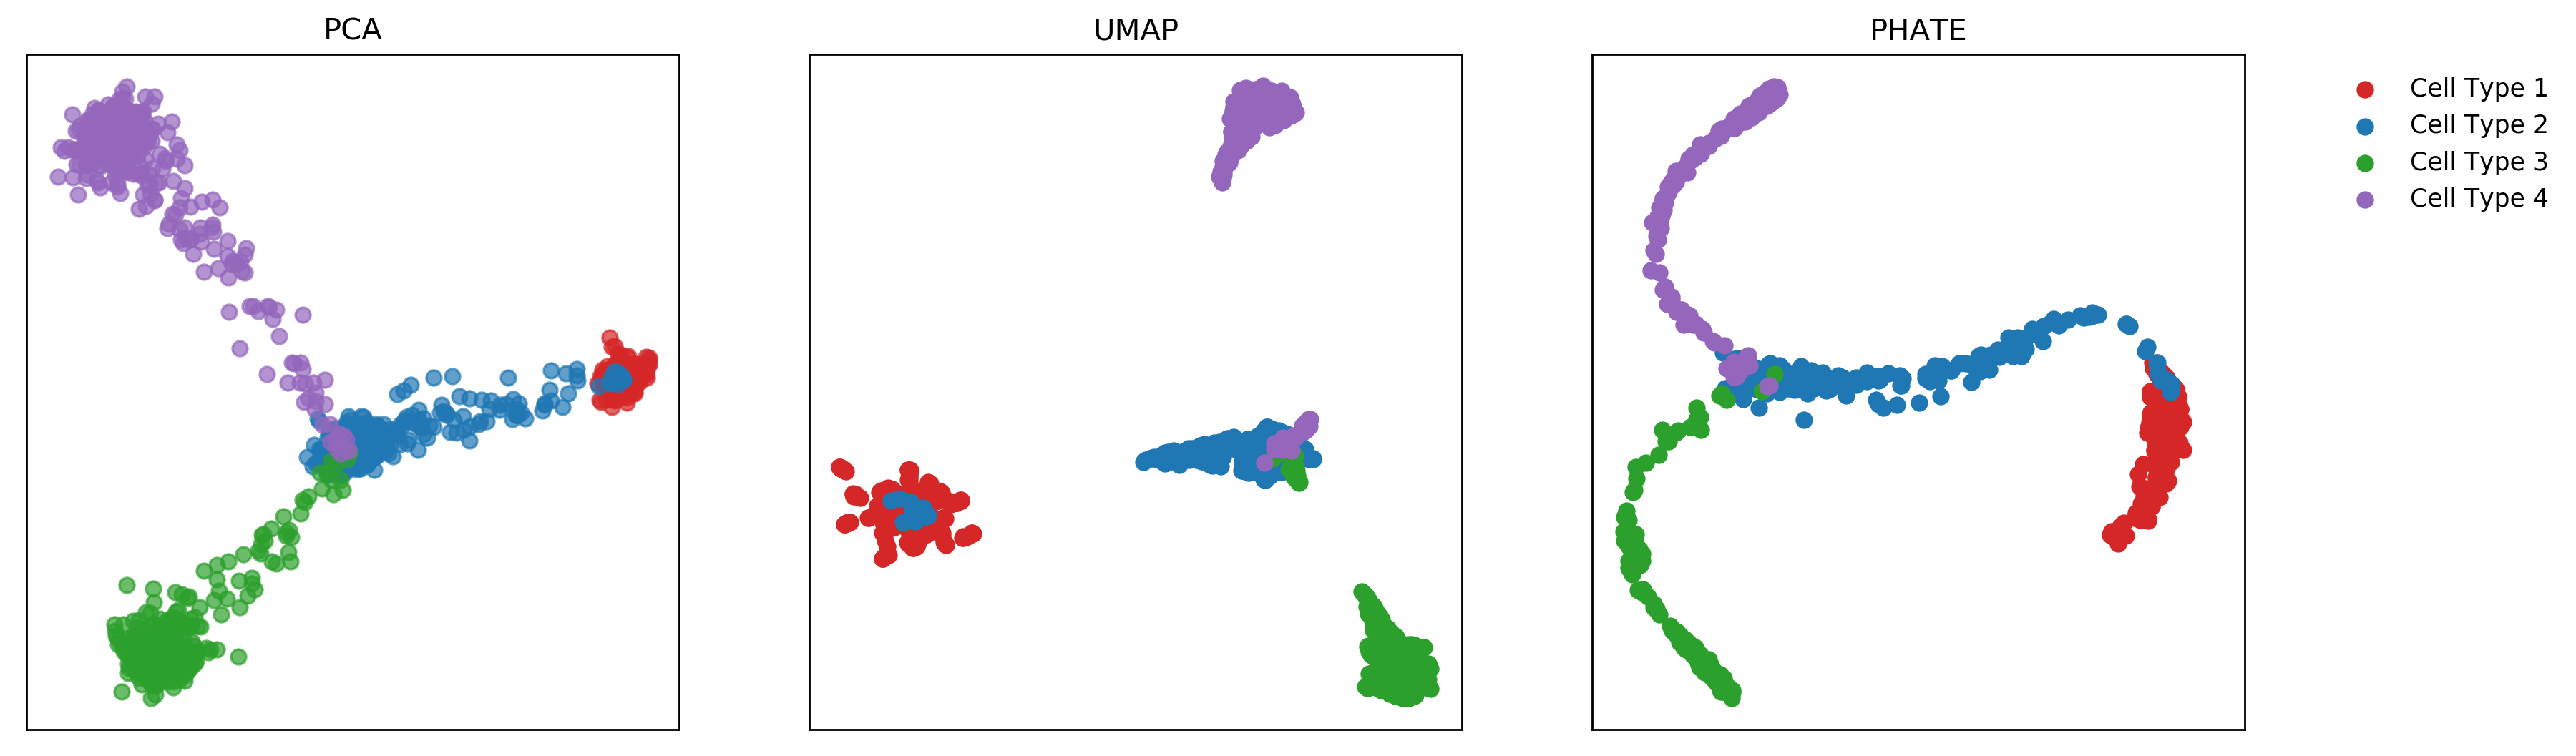

In [11]:
X_PCA_ctype = X_PCA.reshape((num_cell_types, num_cells_per_type, 2))
X_UMAP_ctype = X_UMAP.reshape((num_cell_types, num_cells_per_type, 2))
X_PHATE_ctype = X_PHATE.reshape((num_cell_types, num_cells_per_type, 2))

clr_order = ['#d62728', '#1f77b4', '#2ca02c', '#9467bd', '#ff7f0e', 'gold', '#8c564b']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,5), dpi=250)

for ctype in range(num_cell_types):
    axs[0].scatter(X_PCA_ctype[ctype,:,0], X_PCA_ctype[ctype,:,1], c=clr_order[ctype], alpha=0.7)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("PCA")

for ctype in range(num_cell_types):
    axs[1].scatter(X_UMAP_ctype[ctype,:,0], X_UMAP_ctype[ctype,:,1], c=clr_order[ctype])
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("UMAP")

for ctype in range(num_cell_types):
    axs[2].scatter(X_PHATE_ctype[ctype,:,0], X_PHATE_ctype[ctype,:,1], c=clr_order[ctype], 
                   label=f"Cell Type {ctype+1}")
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_title("PHATE")
axs[2].legend(bbox_to_anchor=(1.5, 1.0), loc=1, frameon=False)

plt.show()